In [1]:
%matplotlib inline
import pandas as pd
import random as rnd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

Step 1) load the datafiles into dataframes to better handling and joining for the KS tests.

In [2]:
#Colony dataframes
bishayee_colony = pd.read_excel("Bishayee Colony Counts 10.27.97-3.8.01.xlsx", skiprows=2,na_values=" ")
outside3_colony = pd.read_excel("Outside Lab 3.Colony Counts.2.4.10-5.21.12.xlsx", skiprows=1)
others_colony = pd.read_excel("Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx", skiprows=1)
#Coulter dataframes
bishayee_coulter = pd.read_excel("Bishayee Coulter Counts.10.20.97-7.16.01.xlsx", skiprows=1)
others_coulter = pd.read_excel("Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.xlsx", skiprows=1)
    #This data file had no header, introduced manually
outside1_coulter = pd.read_excel("Outside Lab 1.Coulter Counts.6.7.91-4.9.99.xlsx")
outside1_coulter.columns = ["Experiment", "C1", "C2", "C3","Average","Date"]
outside2_coulter = pd.read_excel("Outside Lab 2.Coulter Counts.6.6.08-7.7.08.xlsx", skiprows=1)

The following step is to verify the magnitudes of the data in the sets for the coulter and the colony. From the description of the experimental set-up, it seems that the count of the cells using the coulter and the colony count are actually individual experiments with different methods. Hence, they should be analyzed independently

In [3]:
bishayee_colony["Inv"] = "Z"
bishayee_colony.drop('ISOTOPE', axis=1, inplace=True)
bishayee_colony2 = bishayee_colony.iloc[:,[0,1,6,2,3,4,5]]
bishayee_colony2.columns
bishayee_colony2.rename(columns={'Bate # B0/B00':'Batch'},inplace = True)
bishayee_colony2.drop('Batch', axis=1, inplace=True)
others_colony2 = others_colony.rename(columns={'Bates # B00 or B0':'Batch'})
others_colony2.drop('Batch', axis=1, inplace=True)
outside3_colony["Inv"] = "O"
outside3_colony2=outside3_colony.iloc[:,[0,5,1,2,3,4]]
outside3_colony2.rename(columns={'date':'Date','c1':'col1','c2':'col2','c3':'col3'},inplace = True)
df_total = [bishayee_colony2,others_colony2,outside3_colony2]
merged_colony_data = pd.concat(df_total)

Completeness test of the combined colony data

In [4]:
print merged_colony_data.size == bishayee_colony2.size + others_colony2.size + outside3_colony2.size
merged_colony_data.drop("Date",axis =1,inplace=True)
colony_orginal_count =  merged_colony_data.index.size

True


In [5]:
bishayee_coulter2 = bishayee_coulter.drop('Bates', axis=1)
bishayee_coulter2["Inv"] = "Z"
bishayee_coulter2 = bishayee_coulter2.iloc[:,[0,5,1,2,3,4]]
bishayee_coulter2.rename(columns={'Count 1':'col1','Count 2':'col2','Count 3':'col3'},inplace=True)
outside1_coulter2 = outside1_coulter.drop('Experiment', axis = 1)
outside1_coulter2["Inv"] = "O1"
outside1_coulter2 = outside1_coulter2.iloc[:,[4,5,0,1,2,3]]
outside1_coulter2.rename(columns={'C1':'col1','C2':'col2','C3':'col3'},inplace=True)
outside2_coulter2 = outside2_coulter.rename(columns={'Count 1':"col1",'Count 2':"col2",'Count 3':"col3"})
outside2_coulter2["Inv"] = "O2"
outside2_coulter2 = outside2_coulter2.iloc[:,[0,5,1,2,3,4]]
others_coulter2 = others_coulter.drop('Bates No.', axis = 1)
others_coulter2.rename(columns={'Coul 1':'col1','Coul 2':'col2','Coul 3':'col3','Investigator':'Inv'},\
                       inplace=True)
others_coulter2 = others_coulter2.iloc[:,[0,5,1,2,3,4]]
df_total_coulter = [bishayee_coulter2,others_coulter2,outside1_coulter2,outside2_coulter2]
merged_coulter_data = pd.concat(df_total_coulter)

completenes of the coulter data

In [6]:
print merged_coulter_data.size == bishayee_coulter2.size + others_coulter2.size + outside1_coulter2.size \
+ outside2_coulter2.size
merged_coulter_data.drop("Date",axis =1,inplace=True)
coulter_orginal_count = merged_coulter_data.index.size

True


In [7]:
merged_coulter_data = merged_coulter_data.dropna()
merged_coulter_data["LowerRatio"] = 0
merged_coulter_data["UpperRatio"] = 0
merged_coulter_data=merged_coulter_data.dropna()
merged_coulter_data.reset_index(drop=True)
for i in range(0,len(merged_coulter_data)):
    temp_array = np.ones(3)
    for k in range(0,3):
        temp_array[k] = merged_coulter_data.iloc[i,(1+k)]
    temp_array = np.sort(temp_array)
    temp_l = (temp_array[1]-temp_array[0])/(temp_array[2]-temp_array[0])
    temp_u = (temp_array[2]-temp_array[1])/(temp_array[2]-temp_array[0])
    merged_coulter_data.iloc[i,5] = temp_l
    merged_coulter_data.iloc[i,6] = temp_u
    if (merged_coulter_data.iloc[i,5]) == 0 and (merged_coulter_data.iloc[i,6]) != 1:
        print "data issues"

In [8]:
merged_colony_data["LowerRatio"] = 0
merged_colony_data["UpperRatio"] = 0
merged_colony_data.replace(r'\s*',np.nan, regex=True )
merged_colony_data=merged_colony_data.dropna()
merged_colony_data.reset_index(drop=True)
messup_rows=[]
for i in range(0,len(merged_colony_data)):
    temp_array = np.ones(3)
    for k in range(0,3):
        if type(merged_colony_data.iloc[i,(1+k)]) == str or type(merged_colony_data.iloc[i,(1+k)]) == unicode:
            messup_rows.append(i)
            continue
        else:
            temp_array[k] = merged_colony_data.iloc[i,(1+k)]
    temp_array = np.sort(temp_array)
    temp_l = (temp_array[1]-temp_array[0])/(temp_array[2]-temp_array[0])
    temp_u = (temp_array[2]-temp_array[1])/(temp_array[2]-temp_array[0])
    merged_colony_data.iloc[i,5] = temp_l
    merged_colony_data.iloc[i,6] = temp_u
merged_colony_data=merged_colony_data.drop(messup_rows)
for i in range(0,len(merged_colony_data)):
    if (merged_colony_data.iloc[i,5]) == 0 and (merged_colony_data.iloc[i,6]) != 1:
        print "data issues"

In [9]:
colony_ur = merged_colony_data.as_matrix(['UpperRatio'])
colony_ur=np.squeeze(colony_ur)
colony_ur = colony_ur[~np.isnan(colony_ur)]
colony_lr = merged_colony_data.as_matrix(['LowerRatio'])
colony_lr=np.squeeze(colony_ur)
colony_lr = colony_lr[~np.isnan(colony_lr)]
coulter_ur = merged_coulter_data.as_matrix(['UpperRatio'])
coulter_ur=np.squeeze(coulter_ur)
coulter_lr = merged_coulter_data.as_matrix(['LowerRatio'])
coulter_lr=np.squeeze(coulter_lr)

I need to extract the same arrays but only for the suspected individual. The way i'm doing below is not efficient but works. First i create dataframes only for the suspected person for the colony and coulter (called mer_col_data_sus and mer_coul_data_sus resp.). Then we create the same arrays as above for the suspected person (which have _sus appended at the end). 

In [10]:
mer_col_data_sus=merged_colony_data[merged_colony_data['Inv'].isin(['Z'])]
mer_coul_data_sus=merged_coulter_data[merged_coulter_data['Inv'].isin(['Z'])]
colony_ur_sus = mer_col_data_sus.as_matrix(['UpperRatio'])
colony_ur_sus=np.squeeze(colony_ur_sus)
colony_ur_sus = colony_ur_sus[~np.isnan(colony_ur_sus)]
colony_lr_sus = mer_col_data_sus.as_matrix(['LowerRatio'])
colony_lr_sus=np.squeeze(colony_ur_sus)
colony_lr_sus = colony_lr_sus[~np.isnan(colony_lr_sus)]
coulter_ur_sus = mer_coul_data_sus.as_matrix(['UpperRatio'])
coulter_ur_sus=np.squeeze(coulter_ur_sus)
coulter_lr_sus = mer_coul_data_sus.as_matrix(['LowerRatio'])
coulter_lr_sus=np.squeeze(coulter_lr_sus)

In [11]:
#Print empirical CDF plot from a data vector x. 
def cdf_plot(x):
    x_data = np.sort(x)
    y_data = 1. * np.arange(len(x_data))/(len(x_data)-1)
    plt.plot(x_data, y_data)

(2873L,)


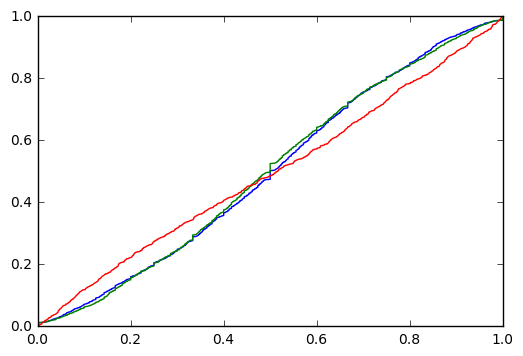

In [12]:
print coulter_ur.shape 
sample_uniform = np.random.uniform(0,1,1000)
cdf_plot(coulter_ur)
cdf_plot(coulter_lr)
cdf_plot(sample_uniform)

(2007L,)


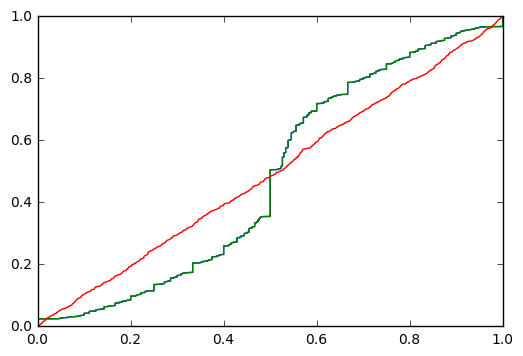

In [13]:
print colony_ur.shape
sample_uniform = np.random.uniform(0,1,1000)
cdf_plot(colony_ur)
cdf_plot(colony_lr)
cdf_plot(sample_uniform)

In [14]:
def ReturnSample(l,n):
    indexes=rnd.sample(range(1,len(l)),n)  
    return np.asarray([l[i] for i in indexes])

In [15]:
def uniformkspermutation(data,permutations,sample_size=100):
    """
    This function is designed to take a set of data and perform a KS statistic permutation test 
    against an uniform distribution sample of size 10000. The output is an array of sixe trials of KS statistics. 
    
    inputs: data is the total population of data
    permutations: is the number of permutations 
    sample_size: is the sample size of the data draw for each permutation
    """    
    result_array = np.ones(permutations,)
    for t in range(0,permutations):
        permutationsample = ReturnSample(data,sample_size)
        test_result =stats.kstest(permutationsample, 'uniform', N=1000)
        result_array[t] = test_result[0]
    return np.squeeze(result_array)

# Test 1:

In this test we attempt to analyse whether the difference in the distribution of the ratio from the susupected person to the uniform distribution is "surprising". To do this we first calculate the difference between the suspected persons ratio distribution and the uniform distribution's cumulative density function using the Kolmogorov Smirnoff test. 
Then we lump together all the data of the suspected person, other people in his lab and the outside scientists. From this larger population we draw a sample of the same size as that of the suspected person's data. We then calcualte the difference between the randomly drawn sample and the unform distribution via the KS test. 
The result of the KS test for each permutation is stored in an array. The frequency distribution of the KS statistic is then plotted and we then find the probability that the difference that we observed could have been observed by chance.
THe reason we perform this test is because deviation from the uniform distribution is used as a justification for finding the person suspicious.



In [54]:
rnd.seed(1235822231)
def Test1(susData,allData,permutations):
    #Step 1. Difference from suspected data
    orig_Diff=stats.kstest(susData, 'uniform', N=1000)
    #Step 2. Permute overall population and blabla
    real_Diff=uniformkspermutation(allData,permutations,len(susData))
    #Step 3. Plot the differences.
    test1_plot= plt.figure()
    plt.hist(real_Diff, bins = 100)
    plt.axvline(x=orig_Diff[0], color = 'r')
    #Step 4. Be surprised "obtain p-value".
    aux_array=real_Diff[np.where(real_Diff<orig_Diff[0])]
    val_less_than_orig=len(aux_array)
    print(val_less_than_orig)
    aux=(val_less_than_orig*1.0)/(len(real_Diff)*1.0)
    return (1-aux)

Let's test Test1 with all the data.

In [38]:
orig_Diff_test = stats.kstest(colony_lr_sus, 'uniform', N=1000)

In [53]:
plt.hist?

10000
The p-value of colony-lr is 0 
10000
The p-value of colony-ur is 0 
10000
The p-value of coulter-lr is 0 
10000
The p-value of coulter-ur is 0 


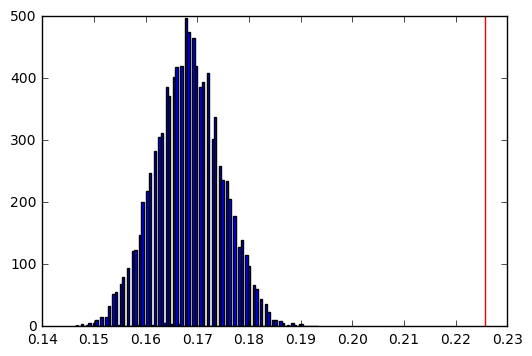

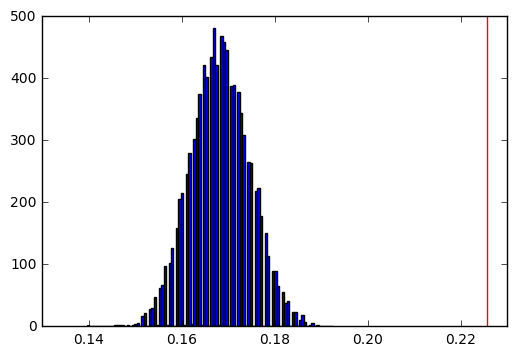

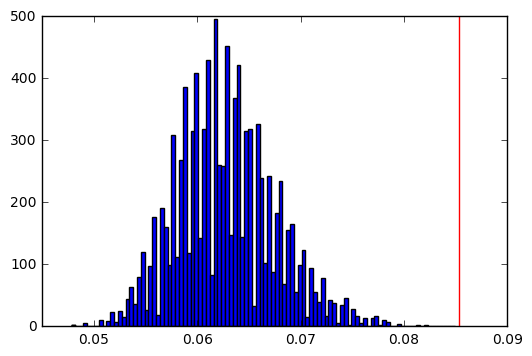

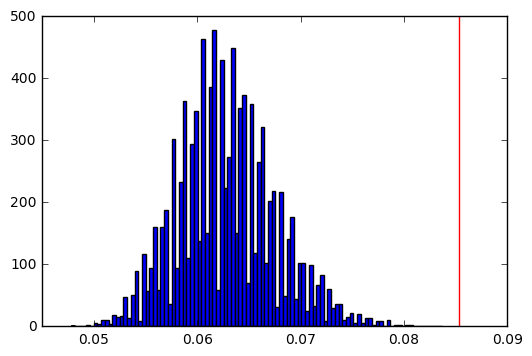

In [55]:
permutations=10000
p_val_col_lr=Test1(colony_lr_sus,colony_lr,permutations)
print "The p-value of colony-lr is %d " % p_val_col_lr 
p_val_col_ur=Test1(colony_ur_sus,colony_ur,permutations)
print "The p-value of colony-ur is %d " % p_val_col_ur
p_val_coul_lr=Test1(coulter_lr_sus,coulter_lr,permutations)
print "The p-value of coulter-lr is %d " % p_val_coul_lr
p_val_coul_ur=Test1(coulter_ur_sus,coulter_ur,permutations)
print "The p-value of coulter-ur is %d " % p_val_coul_ur




In [18]:
#result = uniformkspermutation(coulter_ur,1000, 200)
#plt.hist(result)

The implementation of the ks-test for two samples in scipy is implemented as follows: 

```
data1 = np.sort(data1)
    data2 = np.sort(data2)
    n1 = data1.shape[0]
    n2 = data2.shape[0]
    data_all = np.concatenate([data1, data2])
    cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
    cdf2 = np.searchsorted(data2, data_all, side='right') / (1.0*n2)
    d = np.max(np.absolute(cdf1 - cdf2))
    # Note: d absolute not signed distance
    en = np.sqrt(n1 * n2 / float(n1 + n2))
    try:
        prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
    except:
        prob = 1.0

    return Ks_2sampResult(d, prob)
```

If you see, it assummes that the two samples make up the whole distribution space. Hence we need to be careful on how we provide the data to not over-specify the information. 

In [19]:
sample_test1 = ReturnSample(colony_ur,100)
sample_test2 = ReturnSample(colony_ur,1000)
result = stats.ks_2samp(sample_test1, sample_test2)
print result

Ks_2sampResult(statistic=0.064999999999999947, pvalue=0.82474328303774391)


In [20]:
def ks2samplepermutation(data_benchmark, data_test, trials, sample_size=100):
    """
    This function is designed to take a set of the data "data_benchmark" and perform a KS statistic permutation test 
    against a larger sample to determine wether "data_benchmark" could have been produced from data with the same
    statistical nature as the "data_test"
    """
    if (len(data_benchmark)-len(data_test))/len(data_benchmark) < 0.5:
        print 'The benchmarking data represents more than half of the total sample size, the test might be meaningless'
    result_array = np.ones(trials)
    for t in range(0,trials):
        result = stats.ks_2samp(data_benchmark, data_test)
        result_array[t] = result[0]
    return np.squeeze(result_array)    

In [21]:
sample_test1 = ReturnSample(colony_ur,200)
sample_test2 = ReturnSample(colony_ur,2000)
result = ks2samplepermutation(sample_test1, sample_test2, 1000)

The benchmarking data represents more than half of the total sample size, the test might be meaningless


(array([    0.,     0.,     0.,     0.,     0.,  1000.,     0.,     0.,
            0.,     0.]),
 array([-0.4155, -0.3155, -0.2155, -0.1155, -0.0155,  0.0845,  0.1845,
         0.2845,  0.3845,  0.4845,  0.5845]),
 <a list of 10 Patch objects>)

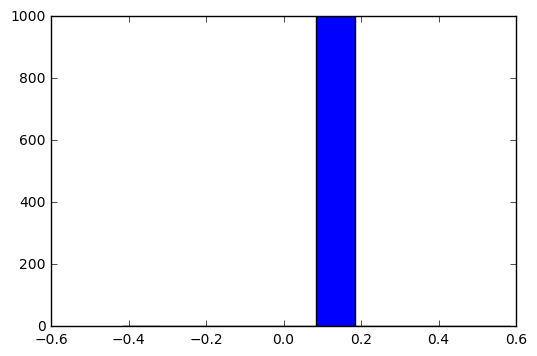

In [22]:
plt.hist(result)